<h1><center>MNIST classification using Keras<center></h1>

# Importing Keras

In [1]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

C:\Users\remij\Miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\remij\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\remij\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


Using tensorflow version 2.4.1
Using keras version 2.4.3


## Loading and preparing the MNIST dataset

Again, load the dataset via ```keras.datasets```, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
from keras.utils.np_utils import to_categorical

train_labels=to_categorical(y_train)
test_labels=to_categorical(y_test)

train_labels.shape

(60000, 10)

In [5]:
# Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = x_train.shape[1], x_train.shape[2]

train_images = x_train.reshape((x_train.shape[0],img_rows*img_cols))
test_images = x_test.reshape((x_test.shape[0],img_rows*img_cols))

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')


# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_images)
train_images=scaler.transform(train_images)

scaler.fit(test_images)
test_images=scaler.transform(test_images)

## Defining the neural network architecture (i.e., the network model)

You can take a look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic commands to use keras.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

In [6]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

input_shape = 784
output_shape = 10

model = Sequential()
model.add(Dense(300, input_dim=input_shape, activation='sigmoid'))
model.add(Dense(output_shape, activation='sigmoid'))

Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [7]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers

eta = 0.01
sgd = optimizers.SGD(lr = eta)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# We can now have a look at the defined model topology
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [8]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

history=model.fit(train_images, train_labels, epochs=epochs, batch_size=10,verbose=2,validation_data=(test_images,test_labels))

Epoch 1/10
6000/6000 - 8s - loss: 0.4778 - accuracy: 0.8737 - val_loss: 0.3058 - val_accuracy: 0.9118
Epoch 2/10
6000/6000 - 9s - loss: 0.2845 - accuracy: 0.9177 - val_loss: 0.2698 - val_accuracy: 0.9219
Epoch 3/10
6000/6000 - 9s - loss: 0.2524 - accuracy: 0.9269 - val_loss: 0.2503 - val_accuracy: 0.9277
Epoch 4/10
6000/6000 - 9s - loss: 0.2312 - accuracy: 0.9336 - val_loss: 0.2346 - val_accuracy: 0.9322
Epoch 5/10
6000/6000 - 9s - loss: 0.2148 - accuracy: 0.9389 - val_loss: 0.2237 - val_accuracy: 0.9350
Epoch 6/10
6000/6000 - 9s - loss: 0.2002 - accuracy: 0.9434 - val_loss: 0.2134 - val_accuracy: 0.9398
Epoch 7/10
6000/6000 - 9s - loss: 0.1869 - accuracy: 0.9475 - val_loss: 0.2055 - val_accuracy: 0.9423
Epoch 8/10
6000/6000 - 10s - loss: 0.1753 - accuracy: 0.9502 - val_loss: 0.1950 - val_accuracy: 0.9446
Epoch 9/10
6000/6000 - 9s - loss: 0.1645 - accuracy: 0.9541 - val_loss: 0.1876 - val_accuracy: 0.9463
Epoch 10/10
6000/6000 - 9s - loss: 0.1543 - accuracy: 0.9569 - val_loss: 0.1851 -

## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


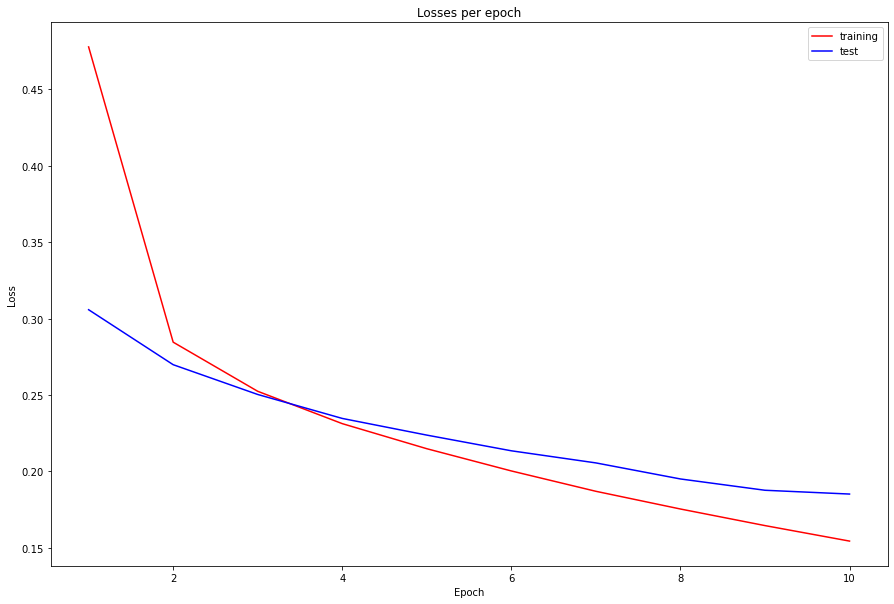

In [14]:
# We now want to plot the train and validation loss functions and accuracy curves
print(history.history.keys())
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
epochs=np.arange(1,11)
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,color='r',label='training')
plt.plot(epochs,val_loss,color='b',label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses per epoch')
plt.legend()
plt.show()

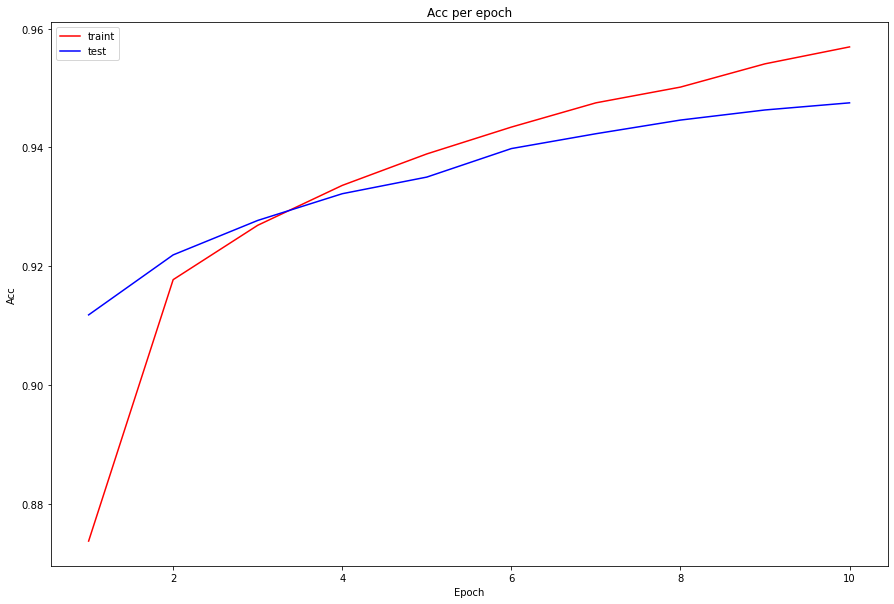

In [15]:
#Accuracies
plt.figure(figsize=(15,10))
epochs=np.arange(1,11)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,color='r',label='traint')
plt.plot(epochs,val_acc,color='b',label='test')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Acc per epoch')
plt.legend()
plt.show()

## Experiments

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$

### 1 - Size of the batch increase

In [16]:
model = Sequential()
model.add(Dense(300, input_dim = input_shape, activation='sigmoid'))
model.add(Dense(output_shape, activation = 'sigmoid'))

eta = 0.01
sgd = optimizers.SGD(lr = eta)
model.compile(loss ='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

history_size = model.fit(train_images, train_labels, epochs=10, batch_size=50,verbose=2,validation_data=(test_images,test_labels))

Epoch 1/10
1200/1200 - 2s - loss: 0.8935 - accuracy: 0.7954 - val_loss: 0.5016 - val_accuracy: 0.8783
Epoch 2/10
1200/1200 - 2s - loss: 0.4435 - accuracy: 0.8846 - val_loss: 0.3837 - val_accuracy: 0.8972
Epoch 3/10
1200/1200 - 2s - loss: 0.3680 - accuracy: 0.8986 - val_loss: 0.3388 - val_accuracy: 0.9042
Epoch 4/10
1200/1200 - 2s - loss: 0.3327 - accuracy: 0.9057 - val_loss: 0.3144 - val_accuracy: 0.9089
Epoch 5/10
1200/1200 - 3s - loss: 0.3109 - accuracy: 0.9107 - val_loss: 0.2983 - val_accuracy: 0.9123
Epoch 6/10
1200/1200 - 3s - loss: 0.2957 - accuracy: 0.9151 - val_loss: 0.2874 - val_accuracy: 0.9159
Epoch 7/10
1200/1200 - 3s - loss: 0.2841 - accuracy: 0.9182 - val_loss: 0.2800 - val_accuracy: 0.9172
Epoch 8/10
1200/1200 - 3s - loss: 0.2746 - accuracy: 0.9209 - val_loss: 0.2728 - val_accuracy: 0.9180
Epoch 9/10
1200/1200 - 3s - loss: 0.2668 - accuracy: 0.9229 - val_loss: 0.2669 - val_accuracy: 0.9198
Epoch 10/10
1200/1200 - 3s - loss: 0.2599 - accuracy: 0.9249 - val_loss: 0.2618 - 

### 2 - Relus modification

In [17]:
model = Sequential()
model.add(Dense(300, input_dim = input_shape, activation='relu'))
model.add(Dense(output_shape, activation = 'relu'))

eta = 0.01
sgd = optimizers.SGD(lr = eta)
model.compile(loss ='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

history_size = model.fit(train_images, train_labels, epochs=10, batch_size=50,verbose=2,validation_data=(test_images,test_labels))

Epoch 1/10
1200/1200 - 2s - loss: nan - accuracy: 0.1931 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/10
1200/1200 - 2s - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/10
1200/1200 - 2s - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/10
1200/1200 - 3s - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/10
1200/1200 - 3s - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/10
1200/1200 - 3s - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/10
1200/1200 - 3s - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/10
1200/1200 - 3s - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 9/10
1200/1200 - 3s - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 10/10
1200/1200 - 3s - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980


### 3 - Larger architecture

In [ ]:
model = Sequential()
model.add(Dense(300, input_dim = input_shape, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(84, activation='sigmoid'))
model.add(Dense(output_shape, activation = 'sigmoid'))

eta = 0.01
sgd = optimizers.SGD(lr = eta)
model.compile(loss ='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

history_size = model.fit(train_images, train_labels, epochs=10, batch_size=50,verbose=2,validation_data=(test_images,test_labels))

Epoch 1/10
1200/1200 - 3s - loss: 2.2737 - accuracy: 0.2104 - val_loss: 2.2261 - val_accuracy: 0.2700
Epoch 2/10
1200/1200 - 3s - loss: 2.1465 - accuracy: 0.4106 - val_loss: 2.0196 - val_accuracy: 0.5495
Epoch 3/10
1200/1200 - 3s - loss: 1.8067 - accuracy: 0.5430 - val_loss: 1.5534 - val_accuracy: 0.6320
Epoch 4/10
1200/1200 - 4s - loss: 1.3253 - accuracy: 0.6685 - val_loss: 1.1065 - val_accuracy: 0.7302
Epoch 5/10
